Import statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import datetime 
import pytz
from pytz import timezone

# Reading and graphing data from one sensor

Reading June data from one of the sensors

In [2]:
df = pd.read_csv("/Users/marin/redhook/redhook/sonycnode-b827eb208550.sonyc.csv", skiprows = 2, low_memory = False)
df.head()

,timestamp,dBAS
0,1.559362e+09,72.71
1,1.559362e+09,72.47
2,1.559362e+09,73.19
3,1.559362e+09,77.52
4,1.559362e+09,76.32


In [3]:
df.tail()

,timestamp,dBAS
2589895,1.561954e+09,57.17
2589896,1.561954e+09,53.77
2589897,1.561954e+09,53.93
2589898,1.561954e+09,54.17
2589899,1.561954e+09,55.92


Creates smaller version of dataframe (only 999 elements) for graphing

In [4]:
smaller_df = df[:1000]
smaller_df.tail()

,timestamp,dBAS
995,1.559363e+09,78.49
996,1.559363e+09,75.22
997,1.559363e+09,74.89
998,1.559363e+09,69.11
999,1.559363e+09,75.74


In [5]:
smaller_df['timestamp'].values.size

1000

Converts timestamps in df to datetime objects

In [6]:
time_arr = np.empty(2589900, dtype = datetime.datetime)
timestamp_arr = df['timestamp'].values
dBAS_arr = df['dBAS'].values

In [7]:
eastern = timezone('US/Eastern')
for i in range(2589900):
    j = timestamp_arr[i]
    dt = datetime.datetime.utcfromtimestamp(j)
    dt = pytz.UTC.localize(dt)
    dt = dt.astimezone(pytz.timezone('US/Eastern'))
    time_arr[i] = dt

In [8]:
# test = smaller_df['timestamp'].values[1]
# test_dt = pytz.UTC.localize(datetime.datetime.utcfromtimestamp(test)).astimezone(pytz.timezone('US/Eastern'))
# type(test_dt)
# time_arr[1]

Creating a new dataframe with timestamps

In [9]:
time_df = df
time_df['timestamp'] = time_arr
time_df.tail()

,timestamp,dBAS
2589895,2019-07-01 00:00:29.540000-04:00,57.17
2589896,2019-07-01 00:00:30.540000-04:00,53.77
2589897,2019-07-01 00:00:31.540000-04:00,53.93
2589898,2019-07-01 00:00:32.540000-04:00,54.17
2589899,2019-07-01 00:00:33.540000-04:00,55.92


Graphs of all data for the month of June

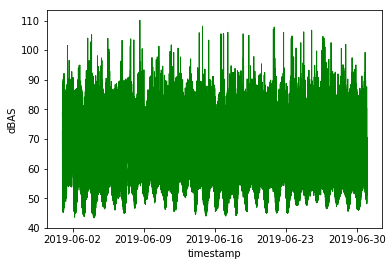

In [10]:
plt.plot(time_arr, dBAS_arr, color = 'green', linewidth = 1)
plt.xlabel('timestamp')
plt.ylabel('dBAS')
plt.show()

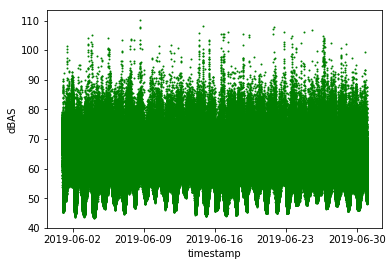

In [11]:
plt.scatter(time_arr, dBAS_arr, color = 'green', s = 1)
plt.xlabel('timestamp')
plt.ylabel('dBAS')
plt.show()

# Averaging data

Dataset with one data point every minute

In [12]:
minute_time_arr = np.empty(43165, dtype = datetime.datetime)
minute_dBAS_arr = np.empty(43165)

In [13]:
step = 60
i = 0
count = 0
while i < 2589900: 
    minute_time_arr[count] = time_arr[i]
    minute_dBAS_arr[count] = np.average(dBAS_arr[i:i+step])
    i += step
    count += 1

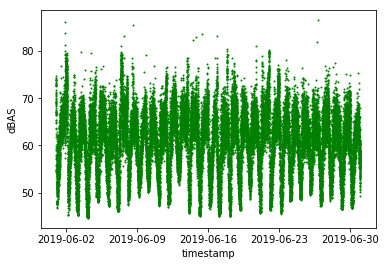

In [14]:
plt.scatter(minute_time_arr, minute_dBAS_arr, color = 'green', s = 1)
plt.xlabel('timestamp')
plt.ylabel('dBAS')
plt.show()

Dataset with one data point every ten minutes

In [15]:
tenmin_time_arr = np.empty(4317, dtype = datetime.datetime)
tenmin_dBAS_arr = np.empty(4317)

In [16]:
tenmin_step = 600
tenmin_i = 0
tenmin_count = 0
while tenmin_i < 2589900: 
    tenmin_time_arr[tenmin_count] = time_arr[tenmin_i]
    tenmin_dBAS_arr[tenmin_count] = np.average(dBAS_arr[tenmin_i:tenmin_i + tenmin_step])
    tenmin_i += tenmin_step
    tenmin_count += 1

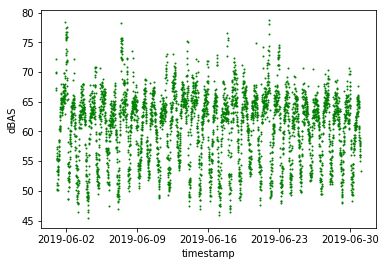

In [17]:
plt.scatter(tenmin_time_arr, tenmin_dBAS_arr, color = 'green', s = 1)
plt.xlabel('timestamp')
plt.ylabel('dBAS')
plt.show()

# Trends over the week

For all of the trends, I'll be using the datasets with one point every ten minutes.

In [18]:
week_1_time_arr = tenmin_time_arr[:1008]
week_1_dBAS_arr = tenmin_dBAS_arr[:1008]

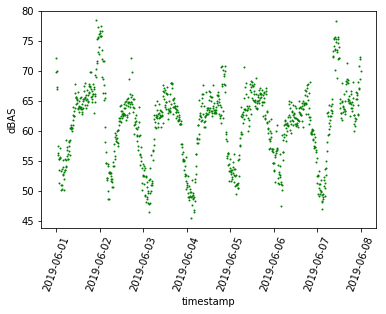

In [19]:
plt.scatter(week_1_time_arr, week_1_dBAS_arr, color = 'green', s = 1)
plt.xlabel('timestamp')
plt.ylabel('dBAS')
plt.xticks(rotation=70)
plt.show()

From this graph, it looks like noise peaks on the 2nd and 7th, which are Sunday and Friday respectively.

# Trends over the day

In [20]:
day_1_time_arr = minute_time_arr[:1430]
day_1_dBAS_arr = minute_dBAS_arr[:1430]

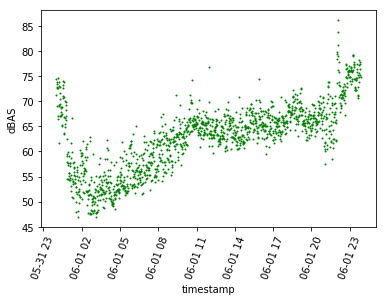

In [21]:
plt.scatter(day_1_time_arr, day_1_dBAS_arr, color = 'green', s = 1)
plt.xlabel('timestamp')
plt.ylabel('dBAS')
plt.xticks(rotation=70)
plt.show()

In [25]:
day_1_shifted_time_arr = minute_time_arr[715:2145]
day_1_shifted_dBAS_arr = minute_dBAS_arr[715:2145]

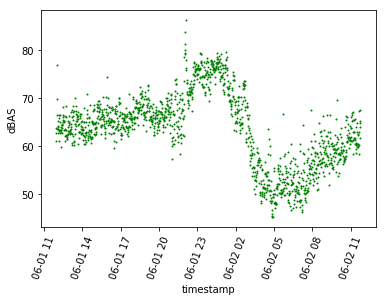

In [26]:
plt.scatter(day_1_shifted_time_arr, day_1_shifted_dBAS_arr, color = 'green', s = 1)
plt.xlabel('timestamp')
plt.ylabel('dBAS')
plt.xticks(rotation=70)
plt.show()

Here we see that the noise generally peaks aroun 12 to 1 a.m. and drops down significantly after.

KMeans clustering on the small dataframe

In [22]:
#kmeans = KMeans(n_clusters=2, random_state=0).fit(smaller_df)
clusters = KMeans(n_clusters=4, random_state=0).fit_predict(smaller_df)

Sample graph demonstrating clustering

In [24]:
# plt.scatter(time_arr, dBAS_arr, c = clusters, s = 1)

In [27]:
minute_time_arr[0]

datetime.datetime(2019, 6, 1, 0, 0, 33, 260000, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)

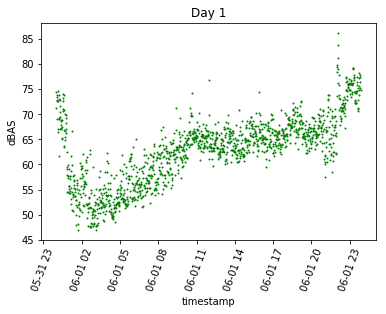

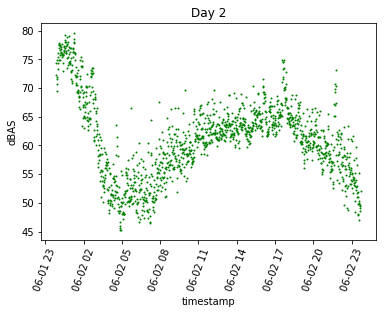

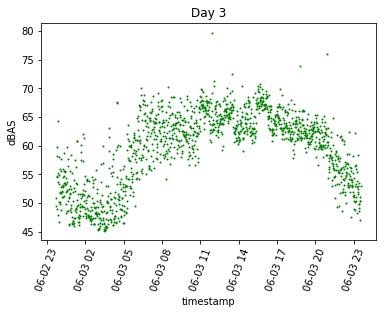

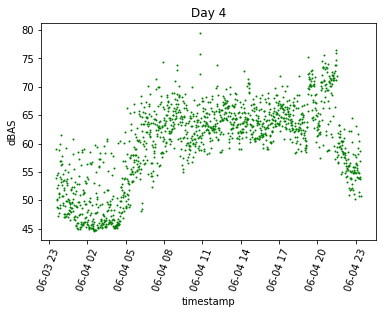

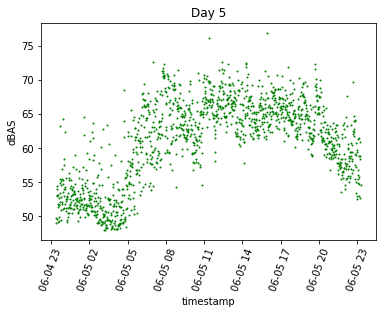

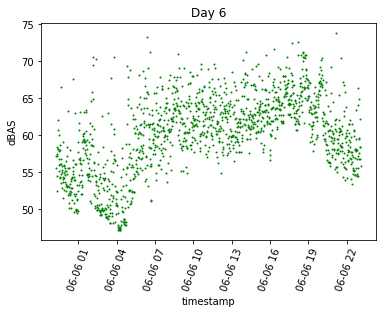

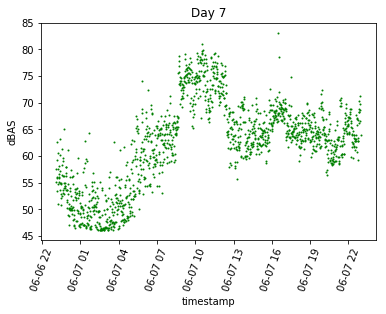

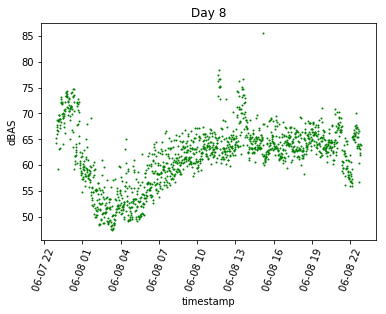

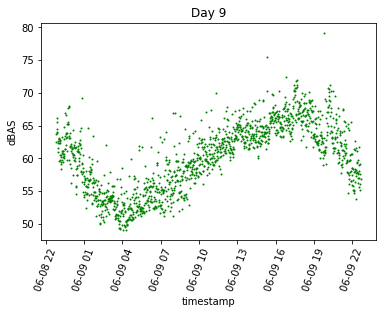

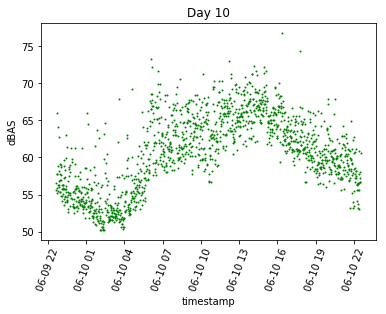

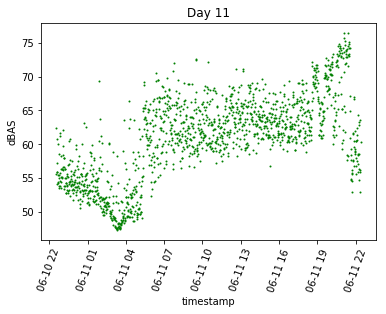

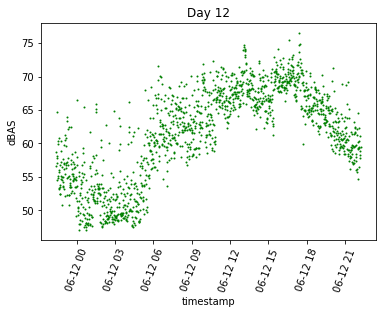

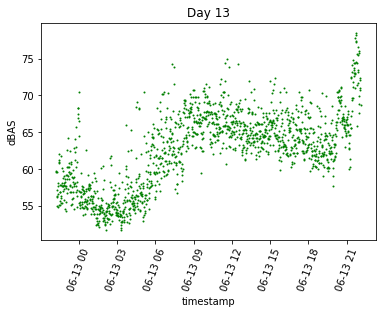

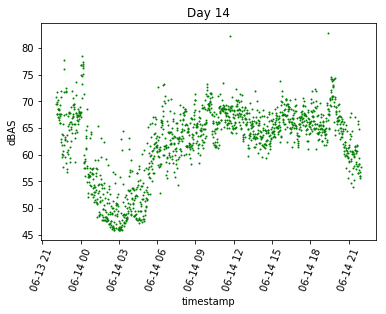

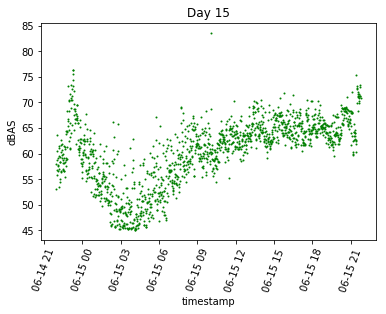

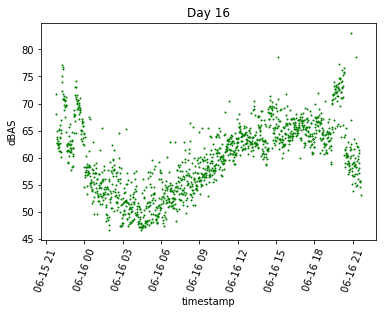

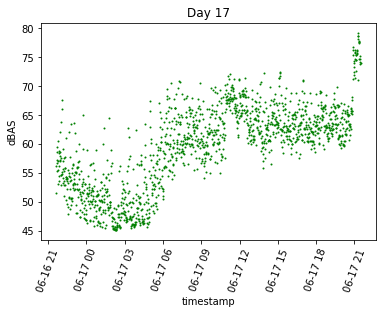

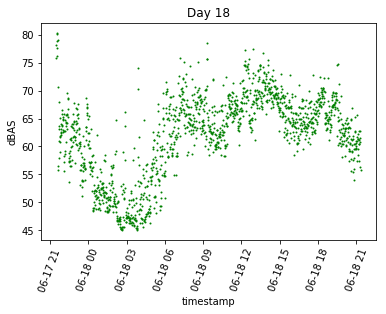

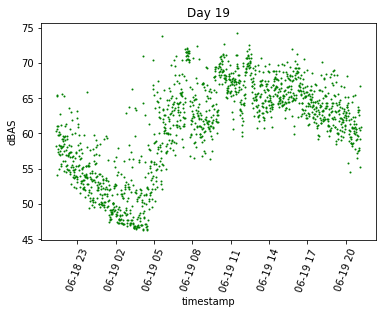

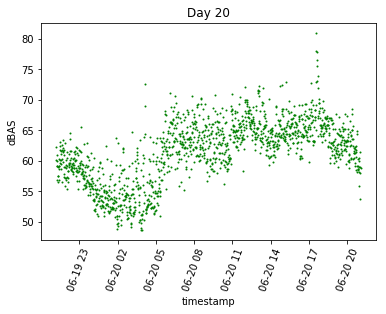

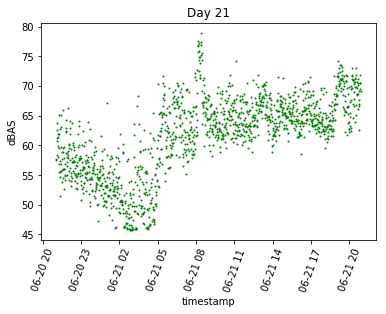

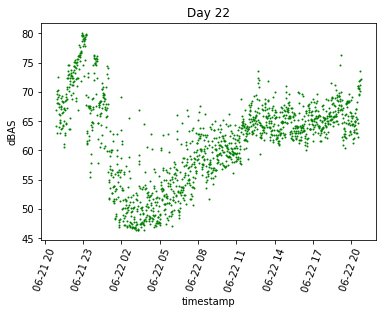

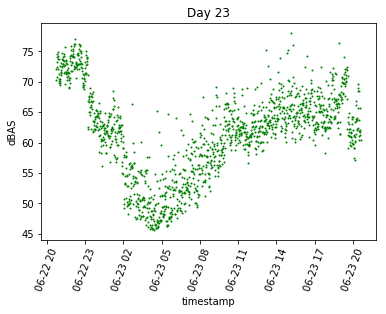

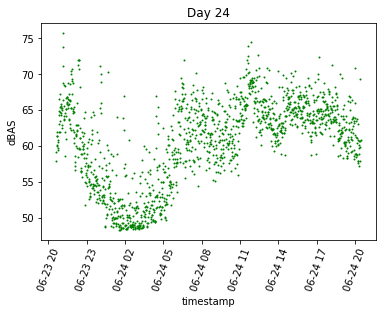

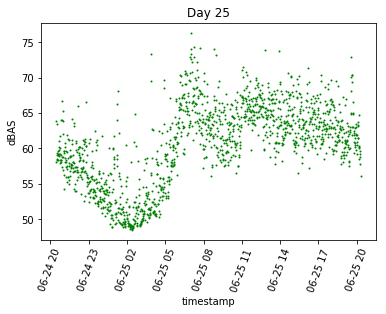

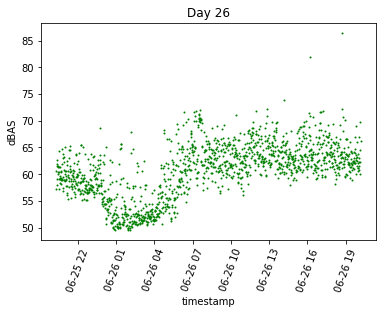

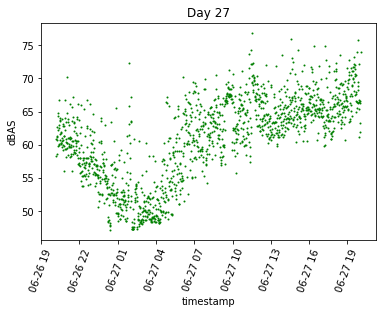

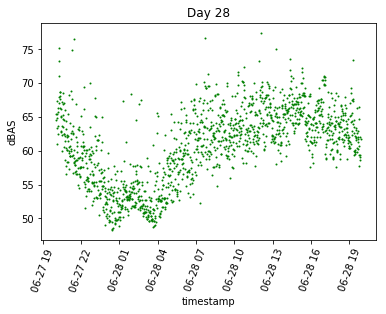

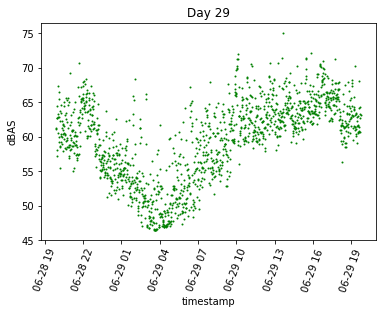

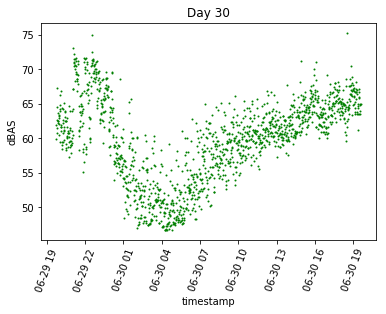

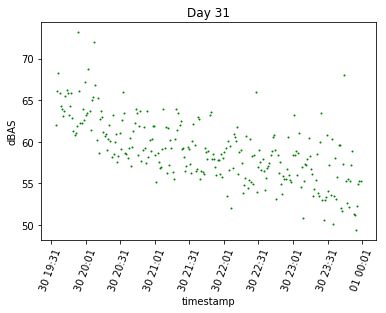

32

In [54]:
x_step = 1430
x = 0
x_count = 1
fig = plt.figure()
while x < 43165:
#     x_subplot = fig.add_subplot(5,7,x_count)
#     x_subplot.plot(minute_time_arr[x:(x+x_step)], minute_dBAS_arr[x:(x+x_step)], color = 'green', s = 1)
#     plt.show()
    plt.scatter(minute_time_arr[x:(x+x_step)], minute_dBAS_arr[x:(x+x_step)], color = 'green', s = 1)
    plt.xlabel('timestamp')
    plt.ylabel('dBAS')
    plt.xticks(rotation=70)
    plt.title('Day ' + str(x_count))
    plt.show()
    x += x_step
    x_count += 1
x_count